## DSTA

### Chapter IV - WWW, Wiki and Online social networks.

#### This __solution__ notebook is taken from the notebook for Ch. 4 of Caldarelli-Cheesa's textbook (CC).

Please see the [class repository]() for the datasets and the __exercise notebook__.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import networkx as nx


#### Get data from The Laboratory for Web Algorithmics

#### This is the page with the datasets: http://law.di.unimi.it/datasets.php

It is possible to download a network in a WebGraph format that is a compressed binary format. 

The project provides various clients to extract the network strcture, in Java, C++ and in Python, py-web-graph: http://webgraph.di.unimi.it/.

In particular we got the graph and the related urls associated to each node of the .eu domain in 2005: http://law.di.unimi.it/webdata/eu-2005/.

 We exctracted the graph in a form of an edge list and we also got the file with the list of urls in the same order of the node_id

In [2]:
ARCSFILE = './data/eu-2005_1M.arcs'

In [3]:
#defining the eu directed graph
eu_DG = nx.DiGraph()
#retrieve just the portion of the first 1M edges of the .eu domain 
#crawled in 2005
eu_DG = nx.read_edgelist(ARCSFILE, create_using = nx.DiGraph())

#generate the dictionary of node_is -> urls
file_urls = open(ARCSFILE)

count = 0

dic_nodid_urls = {}

while True:
    next_line = file_urls.readline()
    
    if not next_line:
        break
    
    next_line[:-1]
    dic_nodid_urls[str(count)] = next_line[:-1]
    count = count+1  
    
file_urls.close()

#generate the strongly connected component
scc = [(len(c),c) for c in sorted( nx.strongly_connected_components \
                               (eu_DG), key=len, reverse=True)][0][1]

eu_DG_SCC = eu_DG.subgraph(scc)


In [4]:
l = [e for e in eu_DG_SCC.edges]

In [5]:
l[:5]

[('49694', '30617'),
 ('49694', '31620'),
 ('49694', '32622'),
 ('49694', '32623'),
 ('49694', '35178')]

#### Retrieving data through the  [Twitter API](https://dev.twitter.com/docs) usign the [Twython](http://twython.readthedocs.org/en/latest/) module

This part is not in use anymore as the TwitterAPI does not generally serve data anymore: we get a `403` error.

Please proceed to the 'HITS algorithm' section below.

## Hits algorithm

##### Create a simple labeled network: the 'four triangles' network

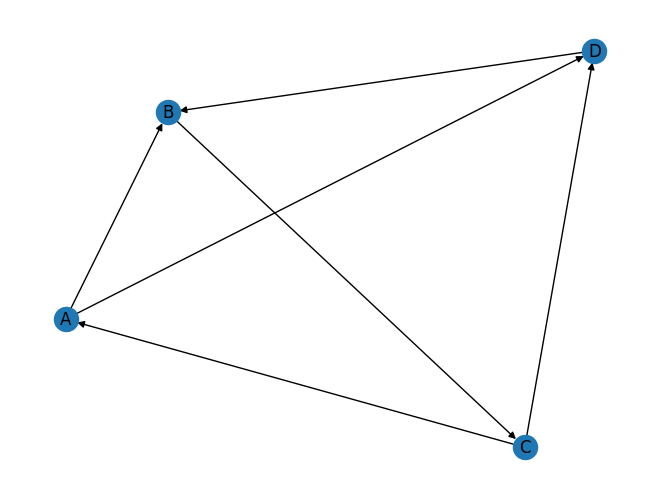

In [6]:
DG = nx.DiGraph()

DG.add_edges_from([('A','B'),('B','C'),('A','D'), \
                   ('D','B'),('C','D'),('C','A')])

#plot the graph
nx.draw(DG, with_labels = True)

The network has a certain symmetry: each node has in-degree of 2 and out-degree of 1 or vice versa.


#### Direct implementation of the [HITS algorithm](https://en.wikipedia.org/wiki/HITS_algorithm) by [Kleinberg](https://en.wikipedia.org/wiki/Jon_Kleinberg).

In [7]:
def HITS_algorithm(DG, K=1000):
    ''' input: -a networkx DiGraph
               -the K maximum number of iterations
                
        output: two dictionaries containing the hub and authority scores, resp.
    '''
        
    auth={}
    hub={}


    for n in DG.nodes():
        auth[n]=1.0
        hub[n]=1.0

    for k in range(K):
        
        norm = 0.0
        
        for n in DG.nodes():
        
            auth[n]=0.0
            
            # REMINDER: a predecessor of a node n is a node m 
            # such that there is a direct edge from m to n
            for p in DG.predecessors(n): 
                auth[n] += hub[p]
        
            norm += auth[n]**2.0
        
        norm = norm**0.5
        
        for n in DG.nodes():
            auth[n] = auth[n]/norm

        norm=0.0
        
        for n in DG.nodes():
            hub[n] = 0.0
            
            for s in DG.successors(n):
                hub[n] += auth[s]
            
            norm += hub[n]**2.0  
            
        norm=norm**0.5
        
        for n in DG.nodes():
            hub[n]=hub[n]/norm
        
        return auth,hub


#### Let's put HITS to test.

In [8]:
(auth, hub) = HITS_algorithm(DG, K=100)

print (auth)
print (hub)

{'A': 0.31622776601683794, 'B': 0.6324555320336759, 'C': 0.31622776601683794, 'D': 0.6324555320336759}
{'A': 0.7302967433402215, 'B': 0.18257418583505539, 'C': 0.5477225575051661, 'D': 0.36514837167011077}


### Q1.  Use built in hits function to find hub and authority scores. 

Can you spot the differences in result? 

Hub Scores:  {'A': 0.4450418679126289, 'B': -7.441283228224162e-17, 'C': 0.35689586789220956, 'D': 0.1980622641951617}
Authority Scores:  {'A': 0.19806226419516162, 'B': 0.3568958678922094, 'C': -1.3408729051748767e-16, 'D': 0.4450418679126291}


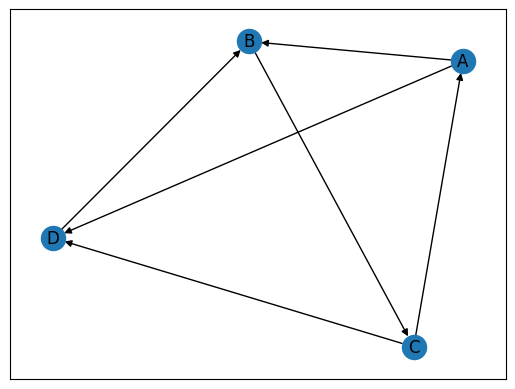

In [9]:
nx.draw_networkx(DG, with_labels = True) 

# your solution here.

hubs, authorities = nx.hits(DG, max_iter = 1000, normalized = True) 
  
print("Hub Scores: ", hubs) 
print("Authority Scores: ", authorities) 

#### Adjacency matrix representation with basic operations

We refrain from using the standard `Numpy` methods for transposing and multiplying matrices.

In [10]:
def matrix_transpose(M):
    
    M_out=[]
    
    for c in range(len(M[0])):
        
        M_out.append([])
        
        for r in range(len(M)):
            M_out[c].append(M[r][c])
            
    return M_out
            

def matrix_multiplication(M1, M2):
    
    M_out=[]
    
    for r in range(len(M1)):
        
        M_out.append([])
        
        for j in range(len(M2[0])):
            e=0.0
            
            for i in range(len(M1[r])):
                e+=M1[r][i]*M2[i][j]
                
            M_out[r].append(e)
            
    return M_out
            



Now, let's test the home-brew functions.

In [11]:

adjacency_matrix1=[
                  [0,1,0,1],
                  [1,0,1,1],
                  [0,1,0,0]
                  ]

adjacency_matrix2 = matrix_transpose(adjacency_matrix1)

print ("Transpose adjacency matrix:", adjacency_matrix2)

res_mul = matrix_multiplication(adjacency_matrix1, adjacency_matrix2)

print ("Matrix multiplication:", res_mul)

Transpose adjacency matrix: [[0, 1, 0], [1, 0, 1], [0, 1, 0], [1, 1, 0]]
Matrix multiplication: [[2.0, 1.0, 1.0], [1.0, 3.0, 0.0], [1.0, 0.0, 1.0]]


Differently from the `Numpy` methods, our functions work with pure lists.

In [12]:
type(res_mul)

list

### The Power-iterations algorithm: a direct implementation

In [13]:
adjacency_matrix=[
                  [0,1,0,1],
                  [1,0,1,1],
                  [0,1,0,0],
                  [1,1,0,0]
                  ]
vector=[
        [0.21],
        [0.34],
        [0.52],
        [0.49]
        ]

# For small examples, few iterations will be needed.
C = 100 

In [14]:
for i in range(C):
    res = matrix_multiplication(adjacency_matrix, vector)
    
    norm_sq = 0.0
    
    for r in res:
        norm_sq = norm_sq+r[0]*r[0]
        
    vector = []
    
    for r in res:
         vector.append([r[0]/(norm_sq**0.5)])
    
print ("Maximum eigenvalue (in absolute value):", norm_sq**0.5)
print ("Eigenvector for the maximum eigenvalue:", vector)


Maximum eigenvalue (in absolute value): 2.1700864866260337
Eigenvector for the maximum eigenvalue: [[0.5227207256439814], [0.6116284573553772], [0.2818451988548684], [0.5227207256439814]]


#### Putting it all together: computing HITS for the WWW strongly-connected component of the `.eu` domain

In [15]:
# Use operator.itemgetter(1) to sort the dictionary by value
import operator

In [16]:
# Your solution here

#Please assign your results to lists sorted_auth and sorted_hub, respectively.

print(eu_DG_SCC)

(auth,hub) = HITS_algorithm(eu_DG_SCC)

sorted_auth = sorted(auth.items(), key = operator.itemgetter(1))

sorted_hub = sorted(hub.items(), key = operator.itemgetter(1))



DiGraph with 17099 nodes and 380517 edges


In [17]:

#top ranking auth
print ("Top 5 by auth")

for p in sorted_auth[:5]:
    print (dic_nodid_urls[p[0]], p[1])
    
#top ranking hub
print ("Top 5 by hub")

for p in sorted_hub[:5]:
    print (dic_nodid_urls[p[0]], p[1])

Top 5 by auth
4467	4091 9.674263879950006e-05
3274	3280 9.674263879950006e-05
2960	750454 9.674263879950006e-05
3313	3310 9.674263879950006e-05
4437	4084 9.674263879950006e-05
Top 5 by hub
3307	3312 7.65711101120921e-07
3369	4085 7.65711101120921e-07
3339	3338 7.65711101120921e-07
3346	3346 7.65711101120921e-07
3336	508108 7.65711101120921e-07


### Q2. Run the built-in `nx.hits` function; can you spot the differences in result? 

In [18]:
# Your solution here

#Please assign your results to lists sorted_auth and sorted_hub, respectively.

hub, auth= nx.hits(eu_DG_SCC, max_iter = 50, normalized = True) #normalized True  normalized the result by the sum of all the values

#(auth,hub)=HITS_algorithm(eu_DG_SCC)
sorted_auth = sorted(auth.items(), key = operator.itemgetter(1))

sorted_hub = sorted(hub.items(), key = operator.itemgetter(1))


In [19]:

print ("Top-5 auth nodes:")

for p in sorted_auth[:5]:
    print (dic_nodid_urls[p[0]], p[1])
    
print ("Top-5 hub nodes:")

for p in sorted_hub[:5]:
    print (dic_nodid_urls[p[0]], p[1])

Top-5 auth nodes:
3156	3187 -3.2866319996381813e-19
3313	3322 -2.9549355349037844e-19
3080	3076 -2.547786081901056e-19
3339	3340 -2.0624561847182145e-19
3307	3294 -2.050951985713075e-19
Top-5 hub nodes:
3325	3322 -5.556868549573762e-22
3313	3320 -5.556868549573762e-22
3336	508108 -3.8785272207664974e-22
3315	3317 -3.8568931374220095e-22
3314	3307 -2.9869502881776103e-22


#### Compute the PageRank

In [20]:
def pagerank(graph, damping_factor = 0.85, max_iterations = 100, min_delta = 0.00000001):
    
    nodes = graph.nodes()
    
    graph_size = len(nodes)
    
    if graph_size == 0:
        return {}
    
    # itialize the page rank dict with 1/N for all nodes
    pagerank = dict.fromkeys(nodes, (1.0-damping_factor)*1.0/ graph_size)
    
    min_value = (1.0-damping_factor)/len(nodes)
    
    for i in range(max_iterations):
        #total difference compared to last iteraction
        diff = 0 
        
        # computes each node PageRank based on inbound links
        for node in nodes:
            rank = min_value
            
            for referring_page in graph.predecessors(node):
                rank += damping_factor * pagerank[referring_page]/ \
                len(list(graph.neighbors(referring_page)))
                
            diff += abs(pagerank[node] - rank)
            
            pagerank[node] = rank
        
        #stop if PageRank has converged
        if diff < min_delta:
            break
    
    return pagerank

#### The Networkx version of [PageRank](http://networkx.github.io/documentation/latest/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html)

{1: 0.17359086186340225, 2: 0.33260446516778386, 3: 0.3202137953926163, 4: 0.17359086304186191}
{1: 0.17359061775974502, 2: 0.33260554622228633, 3: 0.3202132182582236, 4: 0.17359061775974502}


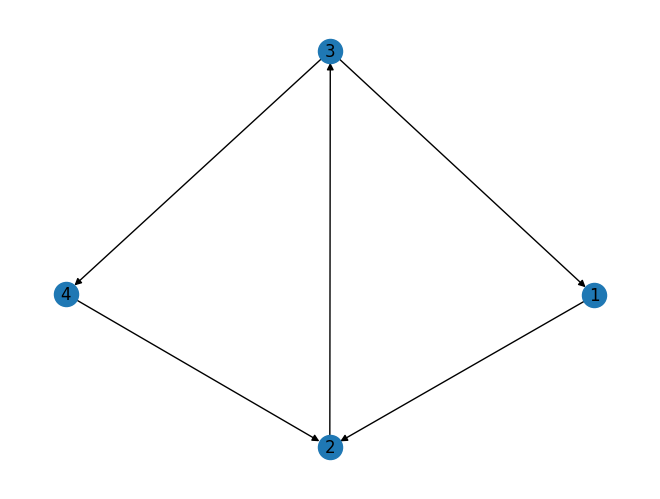

In [21]:
G = nx.DiGraph()

G.add_edges_from([(1, 2), (2, 3), (3, 4), (3, 1), (4, 2)])
#plot the network

nx.draw(G, with_labels = True)

#our Page Rank algorithm
res_pr=pagerank(G, max_iterations = 10000, min_delta = 0.00000001, damping_factor = 0.85)
print (res_pr)

#Networkx Pagerank function
print (nx.pagerank(G,max_iter = 10000))

#### The Twitter Mention Network

Please skip this section as we don't access Twitter/X data anymore; proceed to he `Scwiki` section below.

#### Community Detection for the `Scwiki` network

In [22]:
SCWIKI = './data/scwiki_edgelist.dat'

TITLES = './data/scwiki_page_titles.dat'

Warning: in `.eu` there are pages in the Sardinian language (and perhaps others) which require a specific coding on your own platform.

In [23]:
#load the directed and undirected version og the scwiki graph
scwiki_pagelinks_net_dir = nx.read_edgelist(SCWIKI, create_using = nx.DiGraph())

scwiki_pagelinks_net = nx.read_edgelist(SCWIKI)

#load the page titles
diz_titles = {}

file_titles = open(TITLES, 'r')

while True:
    next_line = file_titles.readline()
    
    if not next_line:
        break
    
    print (next_line.split()[0], next_line.split()[1])
    
    diz_titles[next_line.split()[0]] = next_line.split()[1]
    
file_titles.close()

14209 "Weird_Al"_Yankovic
13890 ''Assandira''
10258 'O_sole_mio
2361 'Onne
6118 (Sittin'_on)_The_Dock_of_the_Bay
6119 (Sittin'_on)_the_Dock_of_the_Bay
10062 ...altrimenti_ci_arrabbiamo!
11039 1054
11019 1065
16053 1082
11222 1090
12579 1096
11596 1100
16054 1110
16055 1138
11307 113_(nÃ¹meru_de_emerzÃ¨ntzia)
16056 1166
10560 118_-_ServÃ¬tziu_de_emerzÃ¨ntzia_sanidÃ
16057 1194
11598 1200
16058 1222
16059 1250
16060 1278
16061 1306
15041 1315
10934 1324
16062 1334
13534 1336
12350 1340
15040 1343
16063 1362
15039 1371
16064 1390
15038 1399
11590 1409
16065 1418
15037 1427
11067 1431
12108 1444
16066 1446
15036 1455
11054 1473
16067 1474
13112 1483
10971 1489
13533 1490
11055 1492
12135 1497
16068 1502
11221 1510
10965 1514
11099 1515
13113 1520
13500 1530
12079 1533
13499 1542
13516 1543
12078 1580
12130 1584
10970 1588
10967 1596
10961 1599
13498 1600
11321 1608
13204 1616
13497 1627
10963 1667
10968 1669
11049 1685
13535 1711
12362 1713
11100 1720
13519 1724
11048 1750
12361 1753
11094 

UnicodeDecodeError: 'charmap' codec can't decode byte 0x8d in position 5689: character maps to <undefined>